<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Ejercicio 2
## Alumno: Jorge Heyul Chavez Arias

In [1]:
import json
import string
import random
import re # Regular Expressions (regex)
import urllib.request

import numpy as np

# Para leer y parsear el texto en HTML de wikipedia
import bs4 as bs

import nltk
# Descargar el diccionario
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heyul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heyul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\heyul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Datos
Se consumirán los datos del artículo de wikipedia sobre el deporte "Tennis" en inglés.

In [2]:
raw_html = urllib.request.urlopen('https://us.as.com/futbol/10-datos-que-debes-conocer-del-mundial-de-qatar-2022-n/')
raw_html = raw_html.read()

# Parsear artículo, 'lxml' es el parser a utilizar
article_html = bs.BeautifulSoup(raw_html, 'lxml')

# Encontrar todos los párrafos del HTML (bajo el tag <p>)
# y tenerlos disponible como lista
article_paragraphs = article_html.find_all('p')

article_text = ''

for para in article_paragraphs:
    article_text += para.text

article_text = article_text.lower()

In [3]:
# Demos un vistazo
article_text

'mundial 2022comienza la cuenta regresiva antes del mundial de qatar 2022. este domingo arrancará la fiesta en qatar. por ello, en as.com decidimos mostrarte algunos datos que seguramente te interesa conocer antes de que los anfitriones y ecuador den la patada inicial del torneo.qatar gastó aproximadamente $229 mil millones de dólares para organizar la copa del mundo de fútbol, misma que arrancará a partir de este domingo. incluye la construcción de siete nuevos estadios de fútbol, un enlace de metro que conecte los estadios, un aeropuerto, hospitales, hoteles y centros comerciales.qatar spent at least $229 billion on infrastructure since winning the bid to host the 2022 soccer world cup, as it pushes to diversify its economy. however, not all are convinced that the big spending means the gas-rich nation can fulfil its economic dream https://t.co/ilbv9htpona 6 días de que inicie el mundial de qatar, se estima que se han vendido $3 mil millones de entradas para la copa del mundo. qatar 

In [4]:
print("Cantidad de caracteres en la nota:", len(article_text))

Cantidad de caracteres en la nota: 3986


### 2 - Preprocesamiento
- Remover caracteres especiales
- Quitar espacios o saltos

In [5]:
# Repaso de regex:
# https://docs.python.org/3/library/re.html

# Para practicar regex:
# https://regex101.com/

# el inicio con 'r' antes de cada string indica que se interprete como raw string
# '\n' es interpretado por Python como salto de linea
# r'\n' es interpretado por Python como el string formado por dos caracteres: 
#  backslash y n

# substituir con regex con espacio vacío:
text = re.sub(r'\[[0-9]*\]', ' ', article_text) # substituir los números entre corchetes
# (notar que los corchetes son interpretados literalmente por los backlsash)
text = re.sub(r'\s+', ' ', text) # substituir más de un caracter de espacio, salto de línea o tabulación

# probar en regex101 con los patrones anteriores:
# 'Hola [1], [], [ estoy bien   [123]. [12sss]. OK!   .'

In [6]:
# Demos un vistazo
text

'mundial 2022comienza la cuenta regresiva antes del mundial de qatar 2022. este domingo arrancará la fiesta en qatar. por ello, en as.com decidimos mostrarte algunos datos que seguramente te interesa conocer antes de que los anfitriones y ecuador den la patada inicial del torneo.qatar gastó aproximadamente $229 mil millones de dólares para organizar la copa del mundo de fútbol, misma que arrancará a partir de este domingo. incluye la construcción de siete nuevos estadios de fútbol, un enlace de metro que conecte los estadios, un aeropuerto, hospitales, hoteles y centros comerciales.qatar spent at least $229 billion on infrastructure since winning the bid to host the 2022 soccer world cup, as it pushes to diversify its economy. however, not all are convinced that the big spending means the gas-rich nation can fulfil its economic dream https://t.co/ilbv9htpona 6 días de que inicie el mundial de qatar, se estima que se han vendido $3 mil millones de entradas para la copa del mundo. qatar 

In [7]:
print("Cantidad de caracteres en el texto:", len(text))

Cantidad de caracteres en el texto: 3986


### 3 - Dividir el texto en sentencias y en palabras

In [8]:
corpus = nltk.sent_tokenize(text) # divide en oraciones
words = nltk.word_tokenize(text) # divide en términos

In [9]:
# Demos un vistazo
corpus[:5]

['mundial 2022comienza la cuenta regresiva antes del mundial de qatar 2022. este domingo arrancará la fiesta en qatar.',
 'por ello, en as.com decidimos mostrarte algunos datos que seguramente te interesa conocer antes de que los anfitriones y ecuador den la patada inicial del torneo.qatar gastó aproximadamente $229 mil millones de dólares para organizar la copa del mundo de fútbol, misma que arrancará a partir de este domingo.',
 'incluye la construcción de siete nuevos estadios de fútbol, un enlace de metro que conecte los estadios, un aeropuerto, hospitales, hoteles y centros comerciales.qatar spent at least $229 billion on infrastructure since winning the bid to host the 2022 soccer world cup, as it pushes to diversify its economy.',
 'however, not all are convinced that the big spending means the gas-rich nation can fulfil its economic dream https://t.co/ilbv9htpona 6 días de que inicie el mundial de qatar, se estima que se han vendido $3 mil millones de entradas para la copa del 

In [10]:
# Demos un vistazo
words[:20]

['mundial',
 '2022comienza',
 'la',
 'cuenta',
 'regresiva',
 'antes',
 'del',
 'mundial',
 'de',
 'qatar',
 '2022.',
 'este',
 'domingo',
 'arrancará',
 'la',
 'fiesta',
 'en',
 'qatar',
 '.',
 'por']

In [11]:
print("Vocabulario:", len(words))

Vocabulario: 733


### 4 - Funciones de ayuda para limpiar y procesar el input del usuario
- Lematizar los tokens de la oración
- Quitar símbolos de puntuación

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

lemmatizer = WordNetLemmatizer()
spanish_stemmer = SnowballStemmer('spanish')

def perform_lemmatization(tokens):
    #return [lemmatizer.lemmatize(token) for token in tokens]
    return [spanish_stemmer.stem(token) for token in tokens]

# ord() nos da el código Unicode para un caracter dado
punctuation_removal = dict((ord(punctuation), None) for punctuation in string.punctuation)

def get_processed_text(document):
    # 1 - reduce el texto a mínuscula (string.lower())
    # 2 - quitar los simbolos de puntuacion (string.translate())
    # 3 - realiza la tokenización (nltk.word_tokenize)
    # 4 - realiza la lematización (nuestra función perform_lemmatization)
    
    #print("1__",nltk.word_tokenize( document.lower().translate(punctuation_removal) , language="spanish" , preserve_line=False))
    #print ("2__", perform_lemmatization(nltk.word_tokenize( document.lower().translate(punctuation_removal) , language="spanish" , preserve_line=False)))
    #return perform_lemmatization(nltk.word_tokenize(document.lower().translate(punctuation_removal)))
    return perform_lemmatization(nltk.word_tokenize( document.lower().translate(punctuation_removal) , language="spanish" , preserve_line=False))

### 5 - Utilizar vectores TF-IDF y la similitud coseno construido con el corpus del artículo de wikipedia

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def generate_response(user_input, corpus):
    response = ''
    # Sumar al corpus la pregunta del usuario para calcular
    # su cercania con otros documentos/sentencias
    # la entrada del usuario se usa para tokenizar y vectorizar
    corpus.append(user_input)
    #print("corpus::::::::::::::::: ", corpus)

    # Crear un vectorizar TFIDF que quite las "stop words" del ingles y utilice
    # nuestra funcion para obtener los tokens lematizados "get_processed_text"
    word_vectorizer = TfidfVectorizer(tokenizer=get_processed_text, stop_words='english')
    #print("word_vectorizer: ", word_vectorizer)

    # Crear los vectores a partir del corpus
    all_word_vectors = word_vectorizer.fit_transform(corpus)
    #print("all_word_vectors: ", word_vectorizer)

    # Calcular la similitud coseno entre todas los documentos excepto el agregado (el útlimo "-1")
    # NOTA: con los word embedings veremos más en detalle esta matriz de similitud
    similar_vector_values = cosine_similarity(all_word_vectors[-1], all_word_vectors)

    # Obtener el índice del vector más cercano a nuestra oración
    # --> descartando la similitud contra nuestor vector propio
    similar_sentence_number = similar_vector_values.argsort()[0][-2]
    matched_vector = similar_vector_values.flatten()
    matched_vector.sort()
    vector_matched = matched_vector[-2]

    if vector_matched == 0: # si la similaridad coseno fue nula (ningún término en común)
        response = "Lo siento, al parecer esa información no la tenemos"
    else:
        response = corpus[similar_sentence_number] # obtener el documento del corpus más similar
    
    corpus.remove(user_input)
    return response

### 6 - Ensayar el sistema
El sistema intentará encontrar la parte del artículo que más se relaciona con nuestro texto de entrada. Sugerencias a ensayar:
- Grand slam
- tournaments
- nadal
- artificial intelligence

In [14]:
# Se utilizará gradio para ensayar el bot
# Herramienta poderosa para crear interfaces rápidas para ensayar modelos
# https://gradio.app/
import sys
#!{sys.executable} -m pip install gradio --quiet

In [16]:
import gradio as gr

def bot_response(human_text):
    print("Q:", human_text)    
    resp = generate_response(human_text.lower(), corpus)
    print("A:", resp)
    return resp

iface = gr.Interface(
    fn=bot_response,
    inputs=["textbox"],
    outputs="text",
    layout="vertical")

iface.launch(debug=True)

c:\Users\heyul\anaconda3\envs\39\lib\site-packages\gradio\deprecation.py:40: UserWarning: `layout` parameter is deprecated, and it has no effect
  warnings.warn(value)



Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Q: cuantos televidentes tendrá ?
A: brasil, alemania, italia, argentina, francia, uruguay, españa e inglaterra son las únicas selecciones nacionales que han logrado alzar el trofeo de campeón, mientras que méxico, con 16 participaciones nunca ha logrado ganar.de acuerdo con la fifa, el número de televidentes podría ser de hasta 5 mil millones de personas en todo el mundo.


c:\Users\heyul\anaconda3\envs\39\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\heyul\anaconda3\envs\39\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'alon', 'anoth', 'anyon', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'betw', 'describ', 'don', 'eith', 'elev', 'elsewher', 'everyon', 'everywher', 'fift', 'fir', 'fiv', 'form', 'furth', 'giv', 'hav', 'henc', 'hereaft', 'howev', 'hundr', 'inde', 'latt', 'mad', 'meanwhil', 'min', 'mor', 'moreov', 'mov', 'nam', 'neith', 'nev', 'nin', 'non', 'noon', 'nowher', 'otherwis', 'ourselv', 'ple', 'rath', 'sam', 'sid', 'sinc', 'sincer', 'som', 'someon', 'sometim', 'somewher', 'tak', 'themselv', 'thenc', 'ther', 'thereaft', 'therefor', 'thes', 'thos', 'thre', 'togeth', 'twelv',

Keyboard interruption in main thread... closing server.


## Conclusiones

Se realizó la modificación del bot, ya no se utiliza "lemmatization", en cambio ahora se usa "steeming", se realizó este cambio ya que no hay soporte en espanol para la libreria nltk.stem.WordNetLemmatizer, sin embargo si la hay para steeming.

A continuacion se muestra un ejemplo al usar steeming:

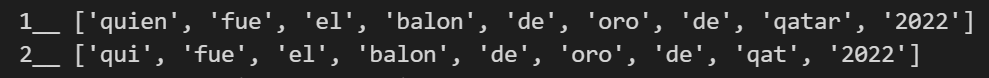

Aunque este método es mas simple y menos "inteligente" funciona de forma correcta, esto se debe a que al final la palabra es tokenizada y no importa si la palabra a tokenizar es "qatar" o "qat" porque del mismo modo será enmascarado.

El corpus fue cambiado a una que posee información sobre el mundial de Qatar 2022.

A continuacion se muestran algunos resultados de consulta al chat bot:

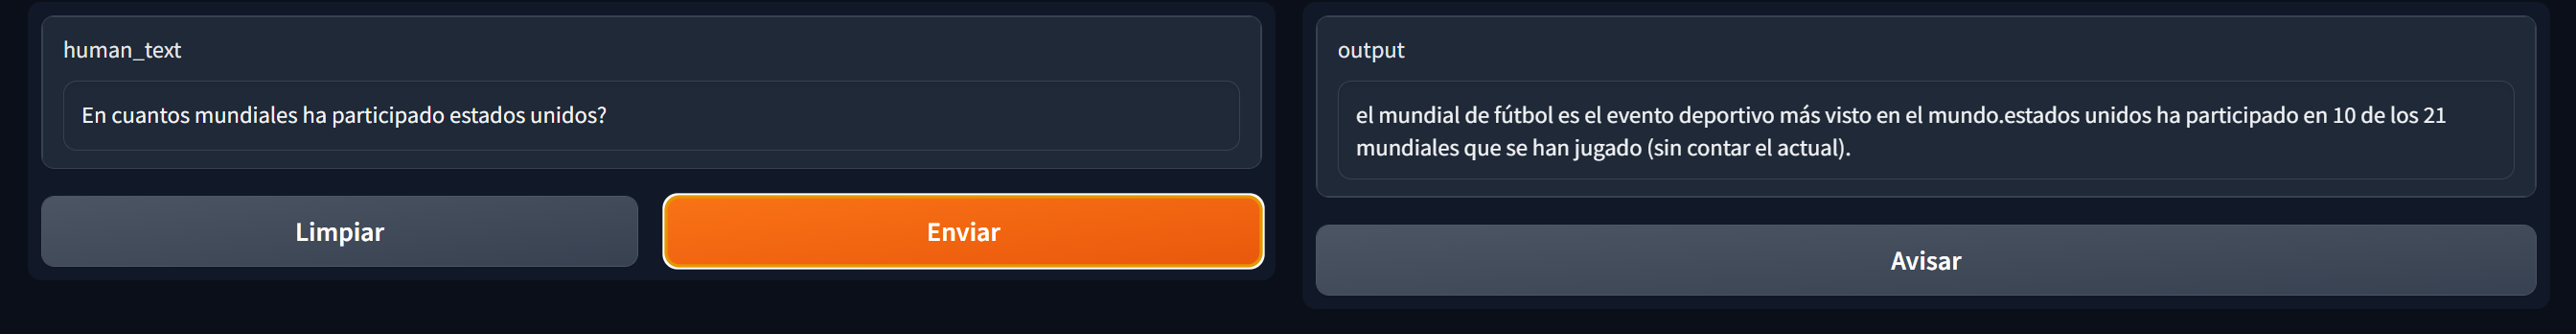

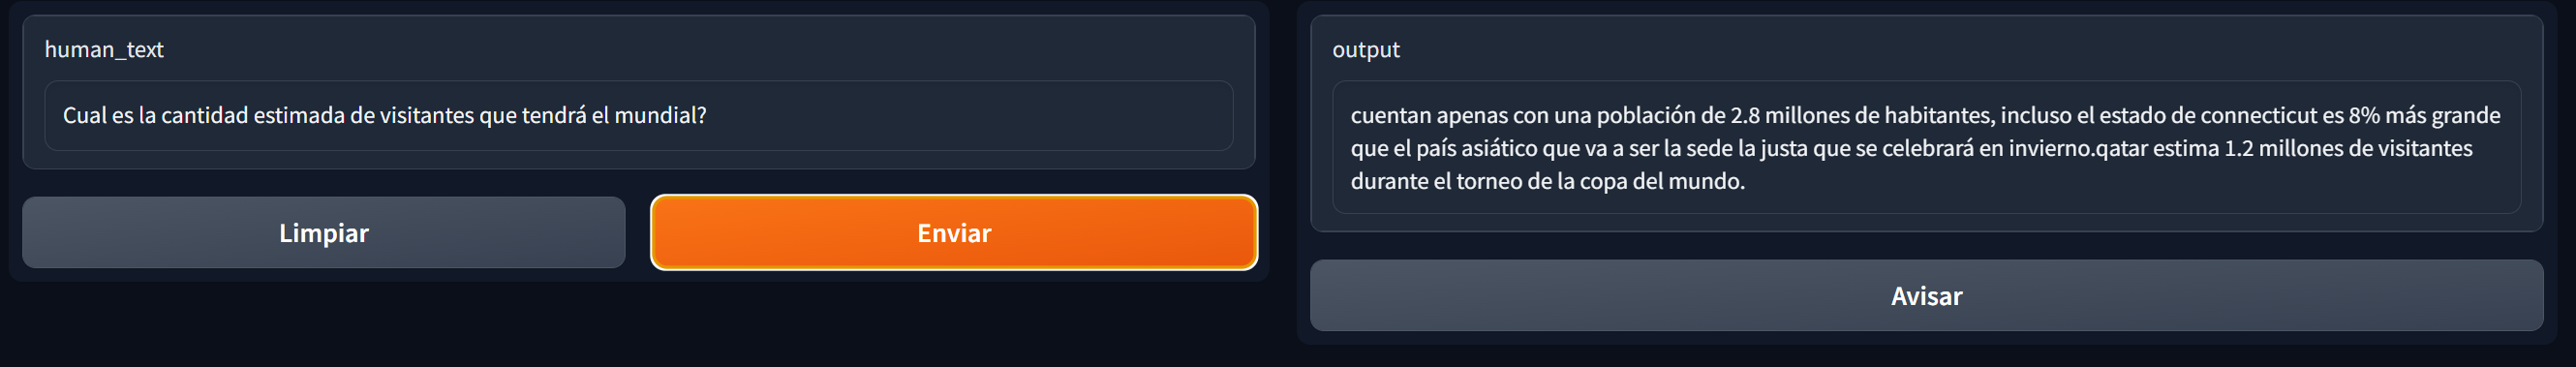

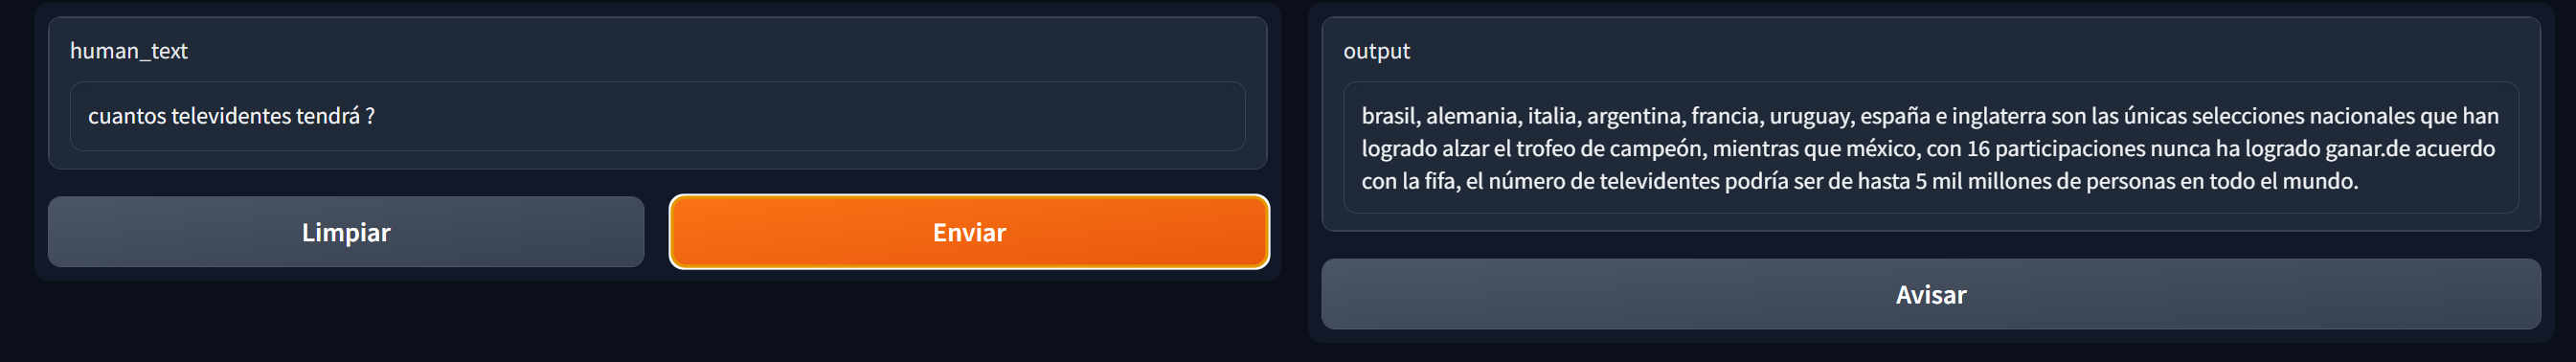